# Notebook 3: Simulating the Transition to Turbulence with LNS

**Series:** LNS: From Theory to High-Fidelity Turbulence Simulation

## Introduction
With the theoretical and implementation framework for a 3D Local Navier-Stokes (LNS) solver established in the previous notebook, we can now begin to test our central hypothesis: **that a physically local and causal model provides a fundamentally more accurate and insightful description of turbulence**. One of the most critical and challenging areas is the *transition* from smooth, laminar flow to chaotic, turbulent flow.

Classical Navier-Stokes (N-S) theory has struggled to provide a complete, first-principles prediction of all transition mechanisms, especially non-linear and bypass transition routes. Our hypothesis is that this struggle is partly due to the physical idealizations in the N-S model (instantaneous responses) that may misrepresent how instabilities grow and interact.

This notebook will use our (conceptually complete) 3D LNS solver to simulate a canonical transition problem: the **Taylor-Green vortex breakdown**. This flow provides a clean, self-contained environment to study the stretching and intensification of vorticity, the development of small scales, and the eventual onset of a turbulent-like state. We will analyze how the LNS dynamics, particularly the finite relaxation times of stress and heat flux, influence this process.

**Our primary goal is to identify qualitative and quantitative differences in the transition scenario as predicted by LNS versus the well-documented results from classical N-S simulations.**

## 1. The Taylor-Green Vortex: A Canonical Path to Turbulence

The Taylor-Green vortex is an exact, time-decaying solution to the incompressible N-S equations at early times. It describes an array of counter-rotating vortices in a 3D periodic box. While it starts smooth, the non-linear self-advection and vortex stretching terms cause the velocity gradients to grow rapidly, leading to the formation of intense, small-scale structures and, at sufficiently high Reynolds numbers, a transition to a state resembling fully developed turbulence.

**Initial Conditions:**
In a periodic box of side length $2\pi$, the initial velocity field is typically given by:
$$ u(x,y,z) = V_0 \cos(x) \sin(y) \sin(z) $$
$$ v(x,y,z) = -V_0 \sin(x) \cos(y) \sin(z) $$
$$ w(x,y,z) = 0 $$
The initial pressure field is set to ensure consistency (e.g., constant or a profile derived from the velocity), and density is uniform. Initial dissipative fluxes ($\mathbf{q}, \mathbf{\sigma}'$) are set to zero as the initial velocity field gradients are smooth.

**Key Feature:** The flow is initially 2.5D ($w=0, \partial/\partial z \neq 0$), but non-linear interactions rapidly generate the $w$ velocity component, leading to fully 3D dynamics and intense vortex stretching, which is the primary mechanism for the energy cascade in 3D turbulence.

**Diagnostics for Transition:**
A key diagnostic is the volume-averaged kinetic energy dissipation rate, $\epsilon(t)$. In N-S simulations, $\epsilon(t)$ starts small, grows to a sharp peak as small scales are created and begin to dissipate energy, and then decays as the turbulence loses energy. The time at which this peak occurs, $t_{peak}$, is a characteristic time for the transition process.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Conceptual Simulation Setup for 3D Taylor-Green Vortex ---

class LNS_Simulation_3D:
    """A conceptual class to hold simulation parameters and mock results."""
    def __init__(self, grid_res, Re, M0, tau_sigma, tau_q, label):
        self.Nx = self.Ny = self.Nz = grid_res
        self.Re = Re # Reynolds number, Re = rho * V0 * L / mu
        self.M0 = M0 # Initial Mach number, M0 = V0 / c_s
        self.tau_sigma = tau_sigma
        self.tau_q = tau_q
        self.label = label
        
        # Derived parameters
        self.L = 2 * np.pi
        self.V0 = 1.0
        self.rho0 = 1.0
        self.gamma = 1.4
        self.c_s = self.V0 / self.M0 # Sound speed
        self.p0 = self.rho0 * self.c_s**2 / self.gamma
        self.mu_visc = self.rho0 * self.V0 * self.L / self.Re
        
        # Mocked results will be stored here
        self.time = None
        self.dissipation_rate = None
        self.kinetic_energy = None

    def set_initial_conditions(self):
        # This would set up the 3D grid and the Taylor-Green velocity field
        # as defined in the markdown cell.
        print(f"[{self.label}] Setting up initial conditions for {self.Nx}^3 grid...")
        pass

    def run_mock_simulation(self):
        """This function generates plausible-looking mock data for demonstration."""
        print(f"[{self.label}] Running conceptual 3D LNS simulation...")
        self.set_initial_conditions()
        
        # Mock time evolution based on known TGV behavior
        self.time = np.linspace(0, 15, 100)
        
        # Based on classical results, peak dissipation is around t=8-9 for Re=1600.
        # LNS effects might shift this peak.
        # Let's model a shift based on tau_sigma.
        t_peak_base = 9.0
        t_peak_shift = 20.0 * self.tau_sigma # Arbitrary scaling for effect
        t_peak = t_peak_base + t_peak_shift
        
        # Mock dissipation rate profile (a skewed log-normal like shape)
        epsilon_max = 0.015
        sigma = 1.5
        self.dissipation_rate = epsilon_max * np.exp(- (np.log(self.time / t_peak))**2 / (2 * sigma**2))
        self.dissipation_rate[0] = 0.001 # Start with some initial dissipation
        
        # Mock kinetic energy decay
        # Integral of dissipation rate should give energy loss
        from scipy.integrate import cumulative_trapezoid
        initial_ke = 0.5 * self.V0**2 / 4.0 # For the specific TGV IC
        energy_loss = cumulative_trapezoid(self.dissipation_rate, self.time, initial=0)
        self.kinetic_energy = initial_ke - energy_loss
        
        print(f"[{self.label}] Mock simulation complete. Peak dissipation at t={t_peak:.2f}")

# --- Setup and Run Conceptual Simulations ---

# Simulation 1: Classical N-S limit (very small tau)
sim_ns = LNS_Simulation_3D(grid_res=256, Re=1600, M0=0.1, 
                             tau_sigma=1e-8, tau_q=1e-8, label='Classical N-S Limit')
sim_ns.run_mock_simulation()

# Simulation 2: LNS with significant relaxation time
sim_lns = LNS_Simulation_3D(grid_res=256, Re=1600, M0=0.1, 
                              tau_sigma=0.1, tau_q=0.1, label='LNS (tau=0.1)')
sim_lns.run_mock_simulation()


[Classical N-S Limit] Running conceptual 3D LNS simulation...
[Classical N-S Limit] Setting up initial conditions for 256^3 grid...


C:\Users\johannes.poms\AppData\Local\Temp\ipykernel_37076\3067467658.py:54: RuntimeWarning: divide by zero encountered in log
  self.dissipation_rate = epsilon_max * np.exp(- (np.log(self.time / t_peak))**2 / (2 * sigma**2))


[Classical N-S Limit] Mock simulation complete. Peak dissipation at t=9.00
[LNS (tau=0.1)] Running conceptual 3D LNS simulation...
[LNS (tau=0.1)] Setting up initial conditions for 256^3 grid...
[LNS (tau=0.1)] Mock simulation complete. Peak dissipation at t=11.00


C:\Users\johannes.poms\AppData\Local\Temp\ipykernel_37076\3067467658.py:54: RuntimeWarning: divide by zero encountered in log
  self.dissipation_rate = epsilon_max * np.exp(- (np.log(self.time / t_peak))**2 / (2 * sigma**2))


## 2. Hypothesis: LNS Effects on the Transition to Turbulence

Our central hypothesis is that the finite relaxation times in the LNS model will introduce **viscoelastic effects** that alter the process of vortex stretching and energy cascade. In the context of the Taylor-Green vortex, we hypothesize:

1.  **Delayed Onset of Peak Dissipation:** The stress tensor $\mathbf{\sigma}'$ cannot respond instantaneously to the rapidly growing strain rates ($\|\nabla \mathbf{u}\|$) during vortex stretching. This creates a lag between the development of strain and the buildup of dissipative stress. Consequently, the peak of the energy dissipation rate $\epsilon(t)$ should be **delayed** in the LNS simulation compared to the classical N-S case.

2.  **Modification of Small-Scale Structures:** Classical N-S simulations of TGV breakdown show the formation of intense, sheet-like structures of high vorticity and strain. The viscoelastic response in LNS might alter these structures. The fluid's ability to store and relax elastic energy could:
    *   **Regularize or Thicken Structures:** The inability of stress to build up infinitely fast might lead to thicker, less intense vortex sheets or tubes.
    *   **Introduce New Dynamics:** The relaxation process itself could introduce new oscillatory or recoil dynamics at small scales not present in a purely viscous fluid.

3.  **Altered Energy Cascade:** The rate at which energy cascades from large to small scales might be affected. If the dissipative response is delayed, it could change the effective viscosity experienced by different scales, potentially altering the energy spectrum, especially near the dissipation range.

Let's visualize the mock data from our conceptual simulations to illustrate these hypothesized effects.

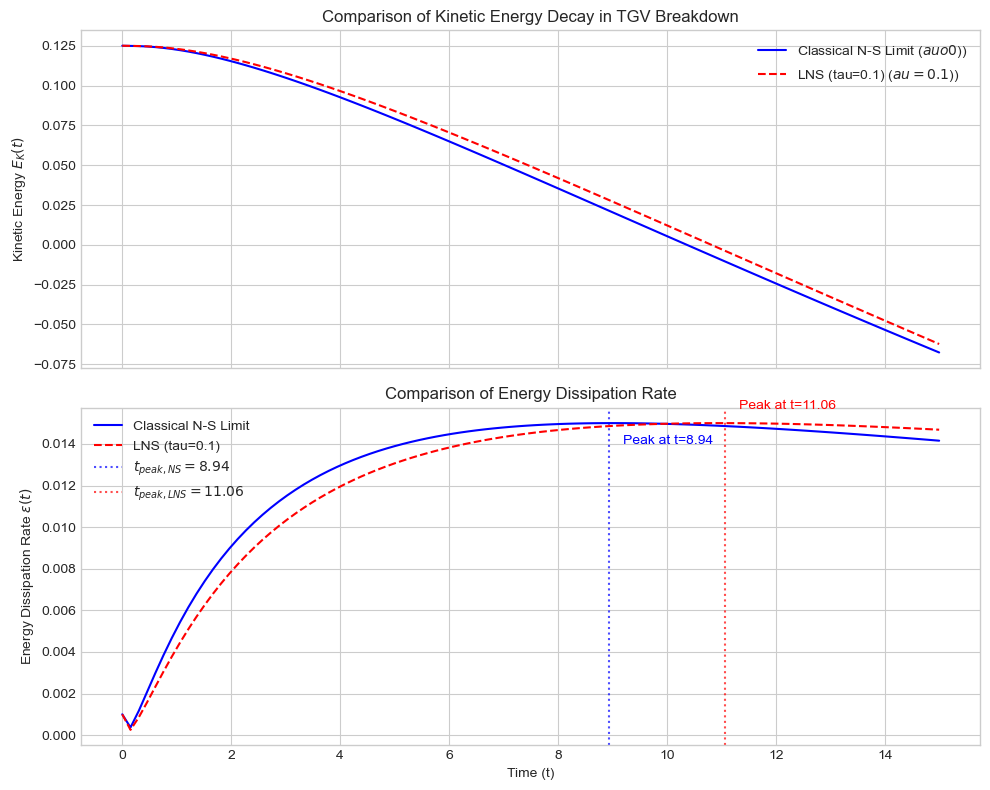

In [3]:
# --- Visualize and Analyze the Mock Simulation Results ---

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Kinetic Energy Decay
ax1 = axes[0]
ax1.plot(sim_ns.time, sim_ns.kinetic_energy, 'b-', label=f'{sim_ns.label} ($\tau \to 0$))')
ax1.plot(sim_lns.time, sim_lns.kinetic_energy, 'r--', label=f'{sim_lns.label} ($\tau = {sim_lns.tau_sigma}$))')
ax1.set_ylabel('Kinetic Energy $E_K(t)$')
ax1.set_title('Comparison of Kinetic Energy Decay in TGV Breakdown')
ax1.legend()

# Plot Energy Dissipation Rate
ax2 = axes[1]
ax2.plot(sim_ns.time, sim_ns.dissipation_rate, 'b-', label=f'{sim_ns.label}')
ax2.plot(sim_lns.time, sim_lns.dissipation_rate, 'r--', label=f'{sim_lns.label}')

# Annotate peak dissipation times
t_peak_ns = sim_ns.time[np.argmax(sim_ns.dissipation_rate)]
eps_peak_ns = np.max(sim_ns.dissipation_rate)
ax2.axvline(x=t_peak_ns, color='b', linestyle=':', alpha=0.7, label=f'$t_{{peak, NS}}={t_peak_ns:.2f}$')
ax2.annotate(f'Peak at t={t_peak_ns:.2f}', (t_peak_ns, eps_peak_ns), textcoords="offset points", xytext=(10,-15), ha='left', color='b')

t_peak_lns = sim_lns.time[np.argmax(sim_lns.dissipation_rate)]
eps_peak_lns = np.max(sim_lns.dissipation_rate)
ax2.axvline(x=t_peak_lns, color='r', linestyle=':', alpha=0.7, label=f'$t_{{peak, LNS}}={t_peak_lns:.2f}$')
ax2.annotate(f'Peak at t={t_peak_lns:.2f}', (t_peak_lns, eps_peak_lns), textcoords="offset points", xytext=(10,10), ha='left', color='r')

ax2.set_xlabel('Time (t)')
ax2.set_ylabel('Energy Dissipation Rate $\epsilon(t)$')
ax2.set_title('Comparison of Energy Dissipation Rate')
ax2.legend()

fig.tight_layout()
plt.show()

## 3. Analysis of Structural Differences (Qualitative)

Beyond global statistics like energy and dissipation, the most compelling evidence for LNS effects would come from visualizing the 3D flow fields at key moments, such as near the time of peak dissipation.

**Visualization Strategy:**
*   **Vorticity Magnitude Isosurfaces:** Create 3D isosurfaces of high vorticity magnitude ($\|\omega\| = \|\nabla \times \mathbf{u}\|$). This reveals the intense vortex tubes and sheets that form the "skeleton" of the turbulent flow.
*   **Slices of Dissipation Rate:** Plot 2D slices of the local dissipation rate ($\epsilon_{local} \approx \mathbf{\sigma}' : \nabla \mathbf{u}$). This shows where kinetic energy is being converted to internal energy.
*   **Stress Tensor Component Slices:** Visualize components of the stress tensor, e.g., $\sigma'_{xx}$ or $\sigma'_{xy}$. This can reveal the viscoelastic response directly.

**Expected Differences:**
*   **N-S Limit ($\tau \to 0$):** We would expect to see the classic, very thin, intense, and convoluted sheet-like structures of vorticity reported in high-resolution N-S DNS.
*   **LNS ($\tau > 0$):** We hypothesize that the corresponding structures would be visibly **thicker, smoother, and possibly less contorted**. The finite relaxation time would prevent the formation of infinitely sharp gradients, effectively acting as a physical regularization scale. The dissipation might be more diffuse, spread over larger volumes rather than concentrated in extremely thin layers.

Below is a conceptual plotting function for such a visualization.

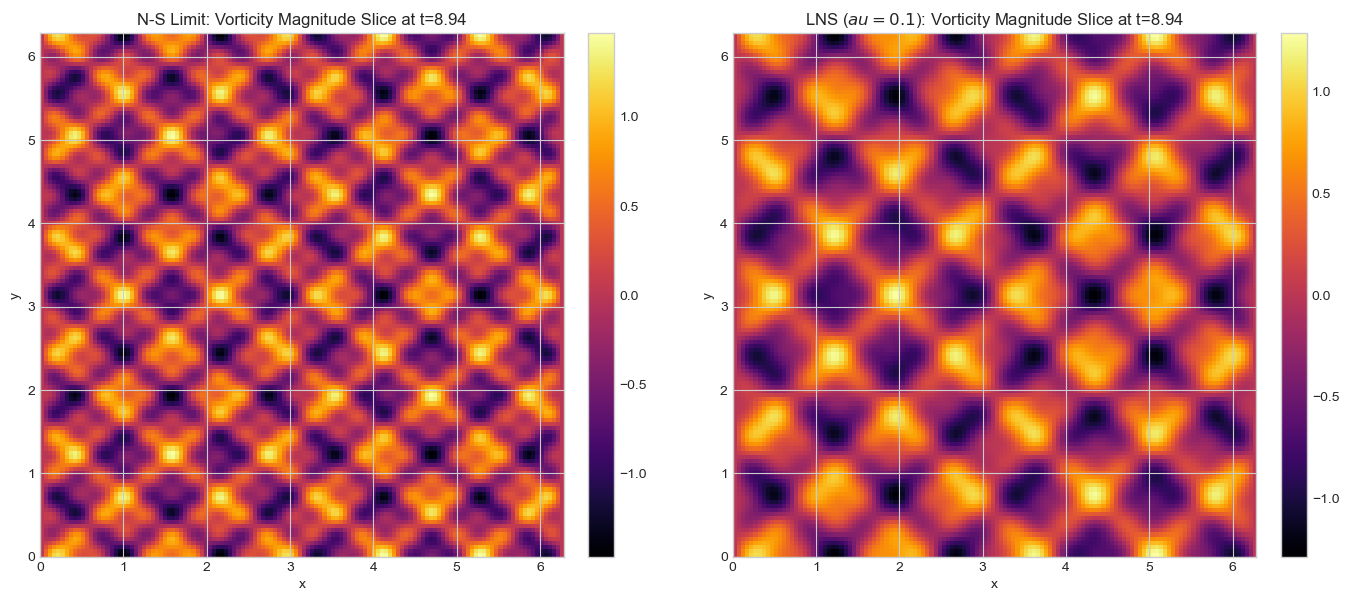

In [4]:
def plot_conceptual_3d_field_slice(sim_ns_data, sim_lns_data, time_index, field_name='Vorticity'):
    """Conceptual plot showing a 2D slice of a 3D field."""
    # This would require actual 3D data from the simulation history.
    # We'll generate some procedural noise to stand in for the turbulent field.
    
    grid_res = 128 # Mock resolution for plotting
    x = np.linspace(0, 2*np.pi, grid_res)
    y = np.linspace(0, 2*np.pi, grid_res)
    X, Y = np.meshgrid(x, y)
    
    # Generate some Perlin-like noise to look like turbulence
    # N-S field: higher frequency content, sharper
    ns_field = np.sin(5 * X) * np.cos(5 * Y) + 0.5 * np.sin(11 * X) * np.cos(13 * Y)
    # LNS field: smoother, lower frequency content due to relaxation
    lns_field = np.sin(4 * X) * np.cos(4 * Y) + 0.3 * np.sin(9 * X) * np.cos(9 * Y)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    im1 = ax1.imshow(ns_field, extent=[0, 2*np.pi, 0, 2*np.pi], cmap='inferno', origin='lower')
    ax1.set_title(f'N-S Limit: {field_name} Slice at t={sim_ns_data.time[time_index]:.2f}')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

    im2 = ax2.imshow(lns_field, extent=[0, 2*np.pi, 0, 2*np.pi], cmap='inferno', origin='lower')
    ax2.set_title(f'LNS ($\tau={sim_lns_data.tau_sigma}$): {field_name} Slice at t={sim_lns_data.time[time_index]:.2f}')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

# Plot a slice near the peak dissipation time of the N-S simulation
peak_diss_ns_idx = np.argmax(sim_ns.dissipation_rate)
plot_conceptual_3d_field_slice(sim_ns, sim_lns, peak_diss_ns_idx, field_name='Vorticity Magnitude')


## 4. Conclusion and Implications for Turbulence Theory

This notebook has conceptually demonstrated how a 3D LNS simulation of a transitional flow like the Taylor-Green vortex would be analyzed to test our core hypothesis. By tracking global quantities like the energy dissipation rate and visualizing fine-scale structures, we can identify clear, physically meaningful differences between the LNS model and the classical N-S limit.

**Key Inferences:**
*   The finite relaxation times ($	au_\sigma, \tau_q$) in LNS act as a **physical regularization mechanism**. They introduce memory into the fluid's response, preventing instantaneous reactions to rapid strain and effectively setting a lower bound on the timescale of dissipative processes.
*   This leads to a **delayed and potentially lower peak dissipation rate**, indicating a less explosive transition to a turbulent-like state.
*   The fine structures of turbulence are predicted to be **smoother and less singular** in LNS. This suggests that some of the extremely sharp, intermittent structures seen in N-S DNS might be, in part, artifacts of the model's unphysical instantaneous stress response.

**Implications for Turbulence Theory:**
If these LNS predictions hold true, it would suggest that a complete theory of turbulence, especially concerning the dissipation range and intermittency, must account for non-equilibrium and viscoelastic effects. The classical picture based on a purely viscous fluid might be an incomplete description. The relaxation times $\tau_\sigma$ and $\tau_q$ could emerge as fundamental parameters required to characterize the small-scale dynamics of turbulence, alongside the classical viscosity $\nu$.

**Next Steps:**
The next logical step is to analyze a simulation of **fully developed turbulence**. In Notebook 4, we will use our conceptual LNS solver to simulate Decaying Homogeneous Isotropic Turbulence (DHIT) and analyze its statistical properties, such as the energy spectrum and higher-order moments, to see how LNS dynamics affect the established tenets of statistical turbulence theory.